In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

In [2]:
df1= pd.read_csv('./cleaned_data.csv')

In [3]:
df1.head()

,Id,Lot Area,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,...,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,109,13517,Sawyer,1Fam,2Story,6,8,1976,2005,HdBoard,...,Attchd,1976.0,2.0,475.0,Y,0,44,3,2010,130500
1,544,11492,SawyerW,1Fam,2Story,7,5,1996,1997,VinylSd,...,Attchd,1997.0,2.0,559.0,Y,0,74,4,2009,220000
2,153,7922,NAmes,1Fam,1Story,5,7,1953,2007,VinylSd,...,Detchd,1953.0,1.0,246.0,Y,0,52,1,2010,109000
3,318,9802,Timber,1Fam,2Story,5,5,2006,2007,VinylSd,...,BuiltIn,2007.0,2.0,400.0,Y,100,0,4,2010,174000
4,255,14235,SawyerW,1Fam,1.5Fin,6,8,1900,1993,Wd Sdng,...,Detchd,1957.0,2.0,484.0,N,0,59,3,2010,138500


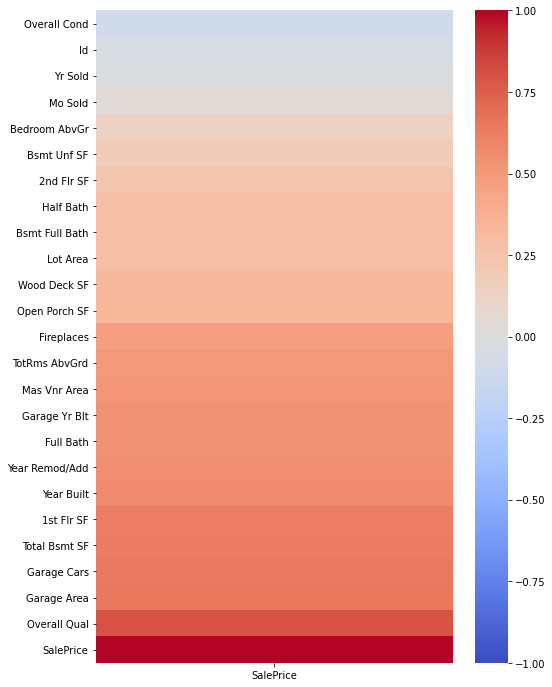

In [4]:
plt.figure(figsize=(8, 12))
sns.heatmap(df1.corr()[['SalePrice']].sort_values('SalePrice'),
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

In [5]:
##The feature most correlated with SalePrice is OverallQual,which is definitely. 
#followed by the size of the house (Total Bsmt SF) and then three more quality related features: Year built, Year Remod/add, 
#and Total rooms abv Grd. 
##We find that there are quite a few features that seem to show strong correlation to SalePrice, such as OverallQual, TotalBsmtSF, GrLivArea, and TotRmsAbvGrd. This confirms our natural intuition: 
#we would expect that high quality, big house with big basements and lots of rooms to be more expensive.
##We also note the occurrence of cone shapes, an artifact of our skewed distributions. Once we log transform some of these features, the relationship will be more linear.

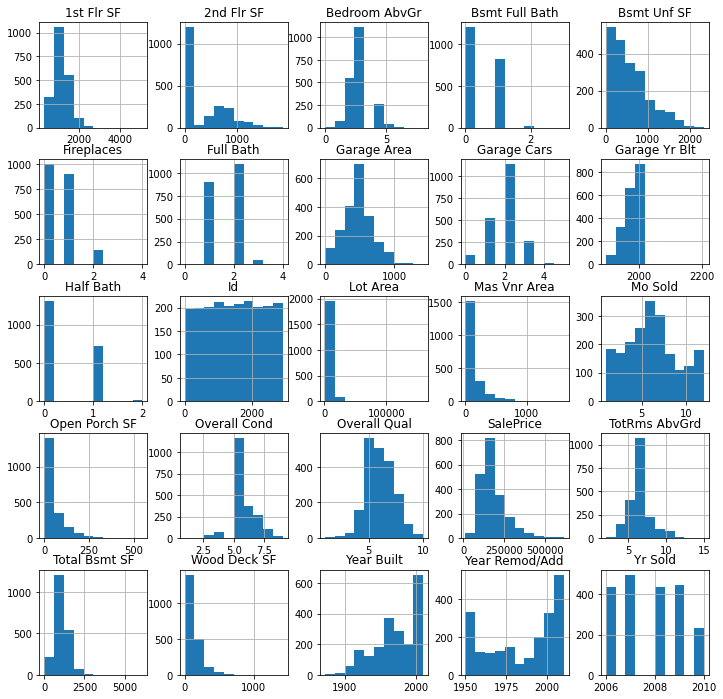

In [6]:
df1.hist(figsize=(12,12));

In [7]:
#The categorical features will be much more interesting when compaired to our target feature SalePrice, but we can note a couple of things nevertheless. First, we note that there are plenty of feature were one value is heavily overrpresented, 
#where nearly 99% of houses are listed as "Norm". That's fine though, as those edge cases may help us predict outliers.
#Mainly Sq ft,Garage Year Built,Total rooms showing positive skew ,linearly they are related with price
#The second thing to realize is that a number of categorical features actually contain rank information in them and should thus be converted to discrete quantitative features similar to OverallQual. 


In [8]:
df1

,Id,Lot Area,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,...,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,109,13517,Sawyer,1Fam,2Story,6,8,1976,2005,HdBoard,...,Attchd,1976.0,2.0,475.0,Y,0,44,3,2010,130500
1,544,11492,SawyerW,1Fam,2Story,7,5,1996,1997,VinylSd,...,Attchd,1997.0,2.0,559.0,Y,0,74,4,2009,220000
2,153,7922,NAmes,1Fam,1Story,5,7,1953,2007,VinylSd,...,Detchd,1953.0,1.0,246.0,Y,0,52,1,2010,109000
3,318,9802,Timber,1Fam,2Story,5,5,2006,2007,VinylSd,...,BuiltIn,2007.0,2.0,400.0,Y,100,0,4,2010,174000
4,255,14235,SawyerW,1Fam,1.5Fin,6,8,1900,1993,Wd Sdng,...,Detchd,1957.0,2.0,484.0,N,0,59,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,11449,Timber,1Fam,1Story,8,5,2007,2007,VinylSd,...,Attchd,2007.0,2.0,520.0,Y,0,276,1,2008,298751
2047,785,12342,Edwards,1Fam,1Story,4,5,1940,1950,VinylSd,...,Detchd,1961.0,2.0,539.0,Y,158,0,3,2009,82500
2048,916,7558,Crawfor,1Fam,1.5Fin,6,6,1928,1950,BrkFace,...,Detchd,1929.0,2.0,342.0,Y,0,0,3,2009,177000
2049,639,10400,NAmes,1Fam,1Story,4,5,1956,1956,Plywood,...,Attchd,1956.0,1.0,294.0,Y,0,189,11,2009,144000


# 

In [9]:
df1['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [10]:
df1

,Id,Lot Area,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,...,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,109,13517,Sawyer,1Fam,2Story,6,8,1976,2005,HdBoard,...,Attchd,1976.0,2.0,475.0,Y,0,44,3,2010,130500
1,544,11492,SawyerW,1Fam,2Story,7,5,1996,1997,VinylSd,...,Attchd,1997.0,2.0,559.0,Y,0,74,4,2009,220000
2,153,7922,NAmes,1Fam,1Story,5,7,1953,2007,VinylSd,...,Detchd,1953.0,1.0,246.0,Y,0,52,1,2010,109000
3,318,9802,Timber,1Fam,2Story,5,5,2006,2007,VinylSd,...,BuiltIn,2007.0,2.0,400.0,Y,100,0,4,2010,174000
4,255,14235,SawyerW,1Fam,1.5Fin,6,8,1900,1993,Wd Sdng,...,Detchd,1957.0,2.0,484.0,N,0,59,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,11449,Timber,1Fam,1Story,8,5,2007,2007,VinylSd,...,Attchd,2007.0,2.0,520.0,Y,0,276,1,2008,298751
2047,785,12342,Edwards,1Fam,1Story,4,5,1940,1950,VinylSd,...,Detchd,1961.0,2.0,539.0,Y,158,0,3,2009,82500
2048,916,7558,Crawfor,1Fam,1.5Fin,6,6,1928,1950,BrkFace,...,Detchd,1929.0,2.0,342.0,Y,0,0,3,2009,177000
2049,639,10400,NAmes,1Fam,1Story,4,5,1956,1956,Plywood,...,Attchd,1956.0,1.0,294.0,Y,0,189,11,2009,144000


In [11]:
df1['Total_Sqft']= df1['Total Bsmt SF']+df1['Wood Deck SF']+df1['Open Porch SF']+df1['1st Flr SF']+df1['2nd Flr SF']

In [12]:
df1.dtypes

Id                  int64
Lot Area            int64
Neighborhood       object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Foundation         object
Bsmt Unf SF       float64
Total Bsmt SF     float64
1st Flr SF          int64
2nd Flr SF          int64
Bsmt Full Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Garage Type        object
Garage Yr Blt     float64
Garage Cars       float64
Garage Area       float64
Paved Drive        object
Wood Deck SF        int64
Open Porch SF       int64
Mo Sold             int64
Yr Sold             int64
SalePrice           int64
Total_Sqft        float64
dtype: objec

In [13]:
df1.SalePrice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [14]:
##The average sale price of a house in our dataset is close to $180,000,
#with most of the values falling within the $130,000 to $215,000 range.

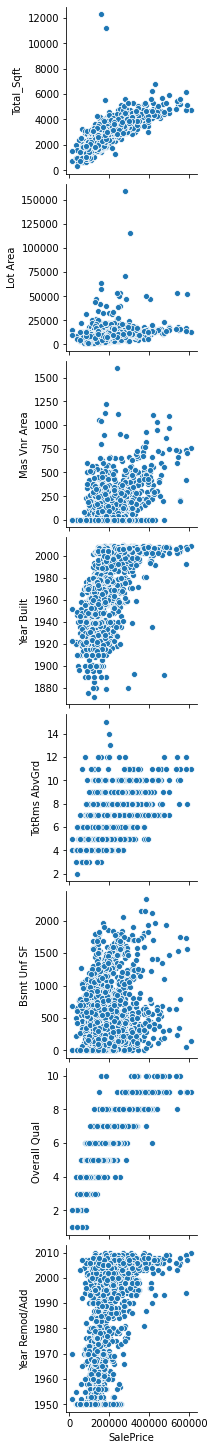

In [15]:

sns.pairplot(df1, x_vars=['SalePrice'], y_vars=['Total_Sqft','Lot Area',
                                                'Mas Vnr Area','Year Built','TotRms AbvGrd','Bsmt Unf SF',
                                                'Overall Qual','Year Remod/Add'])

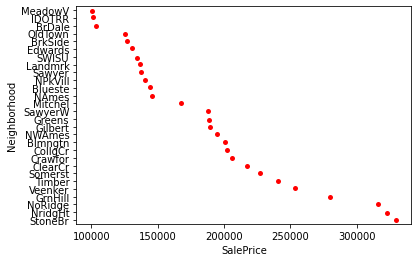

In [16]:
data = pd.concat(
    [
        df1.groupby('Neighborhood').mean()['SalePrice'],
        df1.groupby('Neighborhood').count()['Id']
    ], 
    
    axis=1)
f, ax = plt.subplots()
sns.stripplot(data.sort_values(by='SalePrice').SalePrice, data.sort_values(by='SalePrice').index, orient='h', color='red')

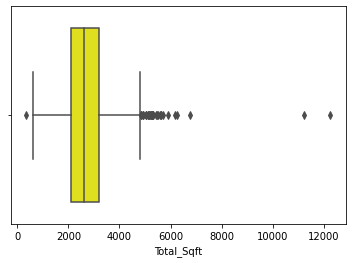

In [17]:
sns.boxplot(df1['Total_Sqft'],color='yellow')
                

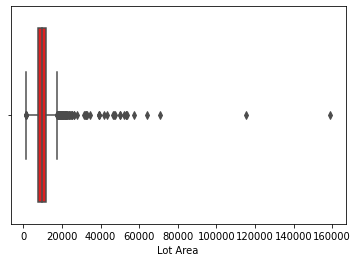

In [18]:
sns.boxplot(df1['Lot Area'],color ='red')

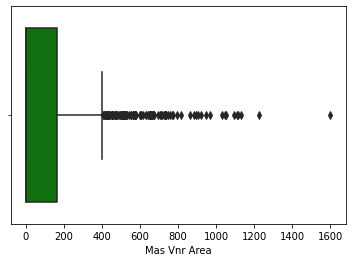

In [19]:
sns.boxplot(df1['Mas Vnr Area'],color ='green')

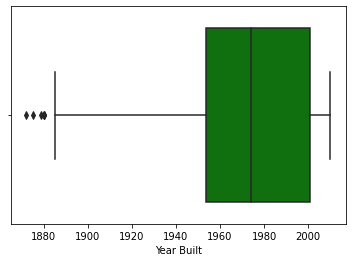

In [20]:
sns.boxplot(df1['Year Built'],color ='green')

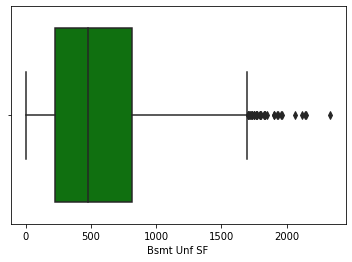

In [21]:
sns.boxplot(df1['Bsmt Unf SF'],color ='green')

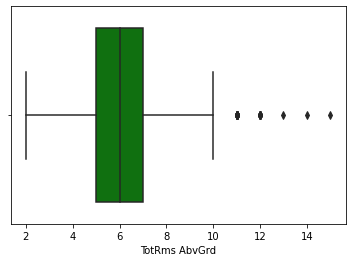

In [22]:
sns.boxplot(df1['TotRms AbvGrd'],color ='green')

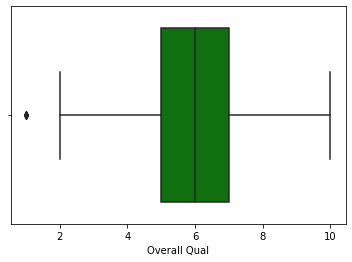

In [23]:
sns.boxplot(df1['Overall Qual'],color ='green')

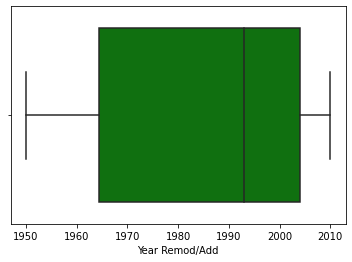

In [24]:
sns.boxplot(df1['Year Remod/Add'],color ='green')

In [25]:
##Box plot to check any outliers for main main features

In [26]:
df1.to_csv("eda_feature_engineered.csv",index=False)